# Downloading and Processing PDFs for Further Analysis

- In this section, we will download a set of PDFs from given URLs, extract the text content from these PDFs, and preprocess the text for further analysis. 

- This involves steps such as downloading the files, reading and extracting text from each PDF.

- Due the purposes of this project, we will be working with only Anticompetitive conducts decisions. 


In [2]:
import pandas as pd
import regex as re

C:\Users\PC\AppData\Local\Temp\ipykernel_2468\4113098713.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv(r"D:\Proyectos\db_comp\database.csv")

,Title,Category,Release Date,Link
0,European Machine Tool Exhibitions (EEMO),Agreement,Date: 13 Mar 1969,https://db-comp.eu/document_1061.download
1,Rechargeable battery,Agreement,Date: 12 Dec 2016,https://db-comp.eu/document_1064.download
2,Occupant Safety Systems (II) supplied to the V...,Agreement,Date: 5 Mar 2019,https://db-comp.eu/document_1065.download
3,Production and distribution of audiobooks,Agreement,Date: 19 Jan 2017,https://db-comp.eu/document_1066.download
4,Aquatrend,Agreement,Date: 21 Jan 2016,https://db-comp.eu/document_1067.download
...,...,...,...,...
1370,Glatfelter/ Crompton Assets,Merger,Date: 20 Dec 2006,https://db-comp.eu/document_2669.download
1371,Thales / Finmeccanica / Alcatel Alenia Space &...,Merger,Date: 4 Apr 2007,https://db-comp.eu/document_2670.download
1372,Travelport/Worldspan,Merger,Date: 21 Aug 2007,https://db-comp.eu/document_2671.download
1373,AEE / LENTJES,Merger,Date: 5 Dec 2007,https://db-comp.eu/document_2672.download


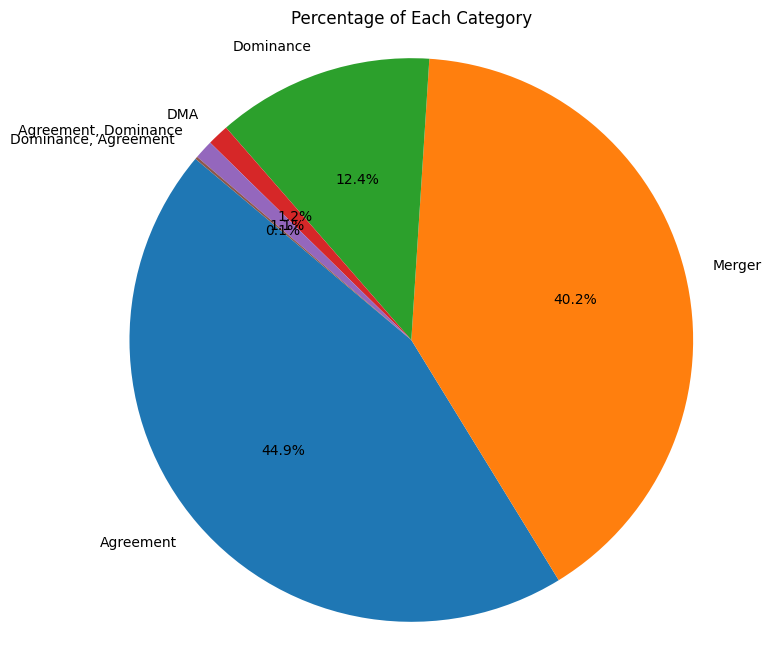

In [6]:
# Now I need to keep only the conducts caselaw. 
import matplotlib.pyplot as plt

category_counts = df['Category'].value_counts(normalize=True) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Each Category')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

In [7]:
conducts_df = df[~df['Category'].isin(['DMA', 'Merger'])]
conducts_df

,Title,Category,Release Date,Link
0,European Machine Tool Exhibitions (EEMO),Agreement,13/03/1969,https://db-comp.eu/document_1061.download
1,Rechargeable battery,Agreement,12/12/2016,https://db-comp.eu/document_1064.download
2,Occupant Safety Systems (II) supplied to the V...,Agreement,05/03/2019,https://db-comp.eu/document_1065.download
3,Production and distribution of audiobooks,Agreement,19/01/2017,https://db-comp.eu/document_1066.download
4,Aquatrend,Agreement,21/01/2016,https://db-comp.eu/document_1067.download
...,...,...,...,...
1333,Capcom,Agreement,20/01/2021,https://db-comp.eu/document_2632.download
1334,Apple - App Store Practices (music streaming),Dominance,04/03/2024,https://db-comp.eu/document_2633.download
1335,Insurance Ireland: Insurance claims database a...,Agreement,30/06/2022,https://db-comp.eu/document_2634.download
1336,Online rail ticket distribution in Spain,Dominance,17/01/2024,https://db-comp.eu/document_2635.download


In [8]:
def clean_title(title):
    # Convert to lowercase
    title = title.lower()
    # Replace spaces with underscores
    title = title.replace(' ', '_')
    # Remove invalid characters using regex
    title = re.sub(r'[\/:*?"<>|]', '', title)
    return title

# Apply the function to the 'Title' column and create a new column 'Cleaned_Title'
conducts_df['Title'] = df['Title'].apply(clean_title)
conducts_df

C:\Users\PC\AppData\Local\Temp\ipykernel_2468\1224337192.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conducts_df['Title'] = df['Title'].apply(clean_title)


,Title,Category,Release Date,Link
0,european_machine_tool_exhibitions_(eemo),Agreement,13/03/1969,https://db-comp.eu/document_1061.download
1,rechargeable_battery,Agreement,12/12/2016,https://db-comp.eu/document_1064.download
2,occupant_safety_systems_(ii)_supplied_to_the_v...,Agreement,05/03/2019,https://db-comp.eu/document_1065.download
3,production_and_distribution_of_audiobooks,Agreement,19/01/2017,https://db-comp.eu/document_1066.download
4,aquatrend,Agreement,21/01/2016,https://db-comp.eu/document_1067.download
...,...,...,...,...
1333,capcom,Agreement,20/01/2021,https://db-comp.eu/document_2632.download
1334,apple_-_app_store_practices_(music_streaming),Dominance,04/03/2024,https://db-comp.eu/document_2633.download
1335,insurance_ireland_insurance_claims_database_an...,Agreement,30/06/2022,https://db-comp.eu/document_2634.download
1336,online_rail_ticket_distribution_in_spain,Dominance,17/01/2024,https://db-comp.eu/document_2635.download


In [9]:
conducts_df.to_csv(r'D:\Proyectos\db_comp\conducts_df.csv', index=False)

In [10]:
import os
import requests

download_dir = r'D:\Proyectos\db_comp\conducts_case_law'
os.makedirs(download_dir, exist_ok=True)

# Loop through the DataFrame and download files
for index, row in conducts_df.iterrows():
    name = row['Title']
    link = row['Link']
    
    response = requests.get(link)
    
    if response.status_code == 200:
        file_extension = 'pdf'
        file_name = f"{name}.{file_extension}"
        
        file_path = os.path.join(download_dir, file_name)
        
        with open(file_path, 'wb') as file:
            file.write(response.content)
        
        print(f"Downloaded: {file_name}")
    else:
        print(f"Failed to download: {name} from {link}")

Downloaded: european_machine_tool_exhibitions_(eemo).pdf
Downloaded: rechargeable_battery.pdf
Downloaded: occupant_safety_systems_(ii)_supplied_to_the_volkswagen_group_and_the_bmw_group.pdf
Downloaded: production_and_distribution_of_audiobooks.pdf
Downloaded: aquatrend.pdf
Downloaded: international_skating_unionâ€™s_eligibility_rules.pdf
Downloaded: maco.pdf
Downloaded: spark_plugs.pdf
Downloaded: uefa_financial_fair_play_rules.pdf
Downloaded: blocktrains.pdf
Downloaded: irish_distillers.pdf
Downloaded: magyar_suzuki_corporation.pdf
Downloaded: parking_heaters.pdf
Downloaded: 40050_volkswagen_group_italia_(seat)_(may_2014)_(italian).pdf
Downloaded: mastercard_ii.pdf
Downloaded: alternators_and_starters.pdf
Downloaded: car_battery_recycling.pdf
Downloaded: lighting_systems.pdf
Downloaded: maritime_car_carriers.pdf
Downloaded: mushrooms.pdf
Downloaded: air_franceklmalitaliadelta.pdf
Downloaded: thermal_systems.pdf
Downloaded: power_exchanges.pdf
Downloaded: e5_-_cooperation_among_large_t

In [8]:
import fitz
import pytesseract
from PIL import Image
import pandas as pd
from unidecode import unidecode
import pdfrw
import PyPDF2
import os

In [10]:
pytesseract.pytesseract.tesseract_cmd = r"D:\Programas\tesseract\tesseract.exe"

def extract_images_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    return doc

def ocr_image(image_path):
    text = pytesseract.image_to_string(Image.open(image_path), lang='spa')

    # Optionally, you can display the image using cv2.imshow() if needed.

    # Cleanup: Remove temporary image file
    try:
        os.remove(image_path)
    except FileNotFoundError:
        pass

    return text

def ocr_pdf(pdf_path):
    doc = extract_images_from_pdf(pdf_path)
    texts = []

    for page_num in range(doc.page_count):
        page = doc[page_num]
        pix = page.get_pixmap()

        image_path = f"temp_image_page_{page_num + 1}.png"

        # Create an image from raw pixmap data
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

        # Save the image
        img.save(image_path)

        text = ocr_image(image_path)
        texts.append(text)

    # Close the PDF document after processing
    doc.close()

    return texts

In [11]:
def text_pdf(pdf_path):
    try:
        # Open the PDF file in binary mode
        with open(pdf_path, 'rb') as file:
            # Create a PDF reader object
            pdf_reader = PyPDF2.PdfReader(file)

            # Get the number of pages in the PDF
            num_pages = len(pdf_reader.pages)

            # Initialize a list to store the extracted text from each page
            text_list = []

            # Loop through all pages and extract text
            for page_num in range(num_pages):
                page = pdf_reader.pages[page_num]
                text_list.append(page.extract_text())

            return text_list

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [12]:
def has_empty_strings(lst):
    """
    Check if a list contains empty strings.

    Parameters:
    - lst (list): List of strings to check.

    Returns:
    - list: List containing None if input list is None, 
            list containing empty strings or None if any, 
            otherwise the original list.
    """
    if lst is None:
        return [None]
    
    return [s for s in lst if s is None or not s.strip()]


In [13]:
def process_pdfs_in_folder(folder_path):
    data = {'Filename': [], 'Text': []}

    pdf_files = [f for f in os.listdir(folder_path) if f.endswith(".pdf")]

    for pdf_file in pdf_files:
        pdf_path = os.path.join(folder_path, pdf_file)
        texto = text_pdf(pdf_path)
        
        empty_strings_present = has_empty_strings(texto)


    # Perform different actions based on whether there are empty strings
        if empty_strings_present:
        # If empty strings are present, use OCR function
            texts = ocr_pdf(pdf_path)
        else:
        # If no empty strings, process the PDF directly
            texts = text_pdf(pdf_path)

        # Append data to DataFrame
        data['Filename'].extend([pdf_file] * len(texts))
        data['Text'].extend(texts)

    return pd.DataFrame(data)

In [14]:
df_text = process_pdfs_in_folder(download_dir)
df_text

An error occurred: list assignment index out of range


MuPDF error: library error: zlib error: incorrect header check
MuPDF error: library error: zlib error: incorrect header check
MuPDF error: library error: zlib error: incorrect header check
MuPDF error: library error: zlib error: incorrect header check
MuPDF error: library error: zlib error: incorrect header check
MuPDF error: library error: zlib error: incorrect header check
MuPDF error: library error: zlib error: incorrect header check
MuPDF error: library error: zlib error: incorrect header check
incorrect startxref pointer(1)
incorrect startxref pointer(1)
unknown widths : 
[0, IndirectObject(908, 0, 2116088214288)]
unknown widths : 
[0, IndirectObject(911, 0, 2116088214288)]
unknown widths : 
[0, IndirectObject(914, 0, 2116088214288)]
unknown widths : 
[0, IndirectObject(917, 0, 2116088214288)]
unknown widths : 
[0, IndirectObject(95, 0, 2116513001776)]
unknown widths : 
[0, IndirectObject(99, 0, 2116513001776)]
unknown widths : 
[0, IndirectObject(103, 0, 2116513001776)]
unknown w

,Filename,Text
0,1998_football_world_cup.pdf,EN Official Journal of the European Communitie...
1,1998_football_world_cup.pdf,EN Official Journal of the European Communitie...
2,1998_football_world_cup.pdf,EN Official Journal of the European Communitie...
3,1998_football_world_cup.pdf,EN Official Journal of the European Communitie...
4,1998_football_world_cup.pdf,EN Official Journal of the European Communitie...
...,...,...
23953,zojacsc_-_ici.pdf,N°L299/54 JournalofficieldesCommunautéseuropée...
23954,zojacsc_-_ici.pdf,31.12.72 JournalofficieldesCommunautés europée...
23955,zojacsc_-_ici.pdf,N°L299/56 JournalofficieldesCommunautés europé...
23956,zojacsc_-_ici.pdf,31.12.72 JournalofficieldesCommunautés europée...


In [16]:
df_text.to_csv(r'D:\Proyectos\db_comp\corpus.csv', index = False)